# Visualization with ggplot and dplyr
 - <a href="http://r4ds.had.co.nz/index.html"> 교재 R for DataScience</a>

In [2]:
library(tidyverse)
library(gridExtra)
library(nycflights13)

## Introduction 
 <img src="src/0216/RD/1.PNG">

### Tips 

In [5]:
# 기존 제공하는 함수가 덮어졌을 경우 Class로 접근
median = function(x){x[0]}
median(c(1,2,3))

numeric(0)

 - Library를 Load하지 않더라도 가능하능하다. 
 - Class::Function() 으로 사용 

In [6]:
stats::median(c(1,2,3))

[1] 2

## 3.Data Visualization
### 3.2.1 mpg data

In [7]:
head(mpg)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,name
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2
3,audi,a4,2,2008,4,manual(m6),f,20,31,p,compact,3
4,audi,a4,2,2008,4,auto(av),f,21,30,p,compact,4
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,6


In [8]:
str(mpg) # tibble format 이다. Rstudio에서는 화면에 크기게 맞게 데이터를 보여주고 각  컬럼의 Type의 알려준다. 

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  12 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...
 $ name        : int  1 2 3 4 5 6 7 8 9 10 ...


### 3.2.2 Creating a ggplot 

In [9]:
options(repr.plot.width=5,repr.plot.height=3)

 - 공통요소들은 ggplot() 안에 넣고 각 그래프 (geom_이름)에는 개별 속성 적용

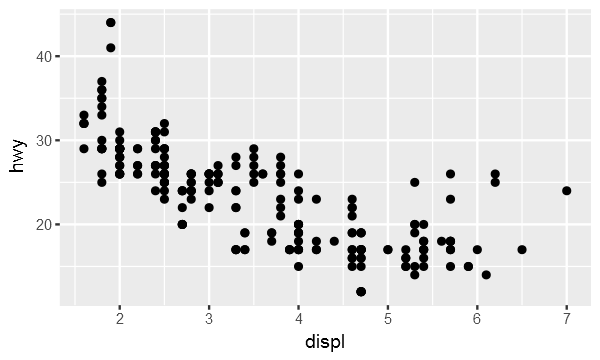

In [10]:
ggplot(data=mpg) + 
  geom_point(mapping = aes(x = displ, y =hwy)) 
##displ 엔진 사이즈, hwy 연비, 효율

 - color가 aes밖에 있는 이유는 data에 mapping되는 것이 아니라 임의의 색이므로

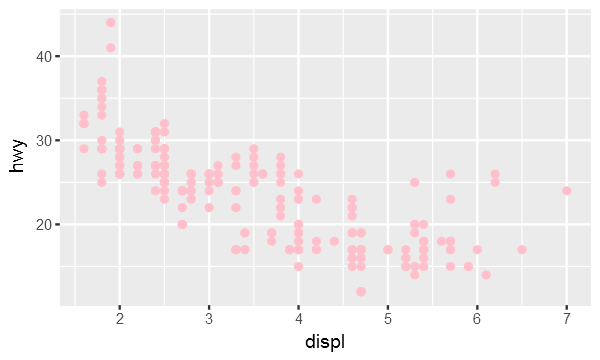

In [11]:
ggplot(data=mpg) + 
  geom_point(mapping = aes(x = displ, y =hwy), color='pink')  

### 3.2.4 Exercise ####
 1. Run ggplot(data = mpg) what do you see? Nothing
 2. How many rows are in mtcars? How many columns? dim(mtcars)
 3. What does the drv variable describe? Read the help for ?mpg to find out. do it ?mpg
 4. Make a scatterplot of hwy vs cyl.

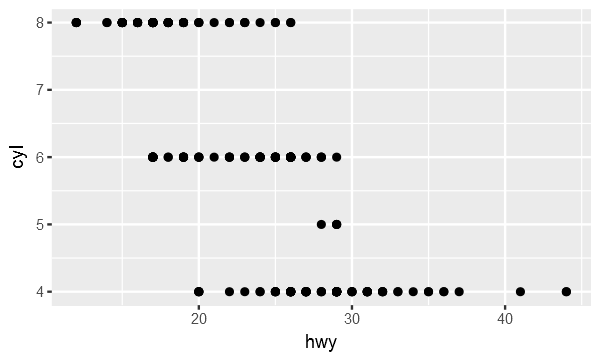

In [12]:
ggplot(data=mpg) + geom_point(aes(x=hwy,y=cyl)) # 명목형이라 Scatter가 의미가 없는듯.

 -   5.What happens if you make a scatterplot of class vs drv. Why is the plot not useful?

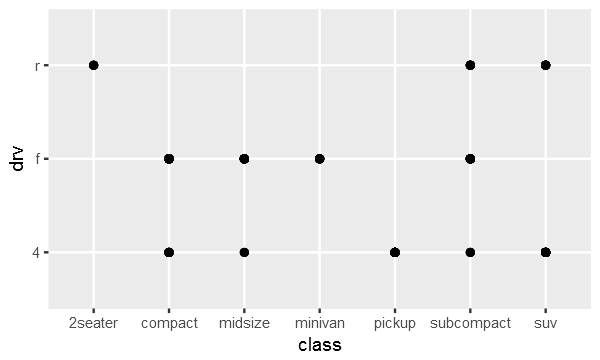

In [13]:
ggplot(data=mpg) + geom_point(aes(x=class,y=drv)) # 둘다 명목이라 의미가 없는 듯.

### 변수의 종류 
 - 연속변수 : 숫자
 - 이산변수(범주형변수) : 1,2,3 / 10,20,30 
 - 명목변수 : 남,여
 
### Scatter plot은 변화가 있는 모습을 확인하려고 사용하는데, 범주나 명목은 변화가 없다 => 즉, 쓸모가 없다.

### 3.3 Aesthetic Mappings #### 
 - color를 aes안에 넣게 되면 data에 mapping 

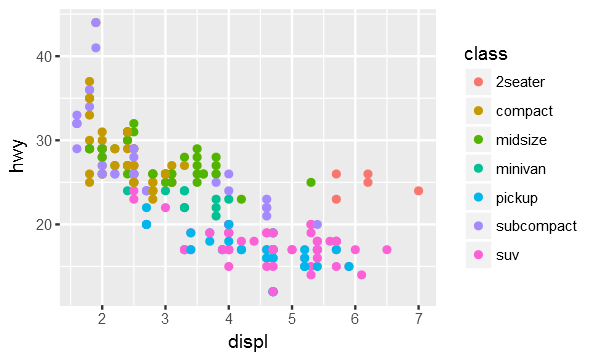

In [14]:
ggplot(data=mpg) + geom_point(aes(displ, hwy, color=class))

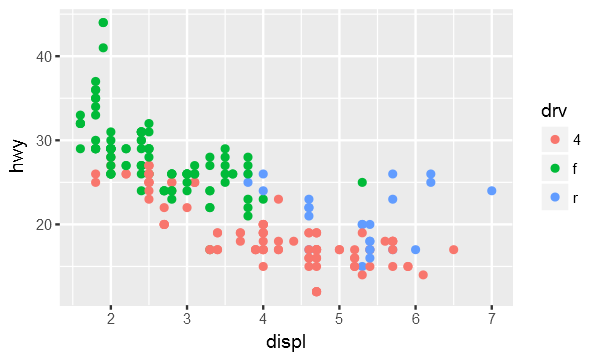

In [15]:
ggplot(data=mpg) + 
  geom_point(mapping = aes(x = displ, y =hwy, color=drv)) # 색

Warning message:
: The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.Warning message:
: Removed 62 rows containing missing values (geom_point).

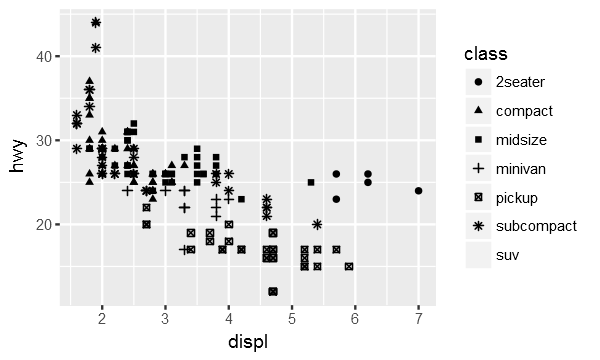

In [16]:
ggplot(data=mpg) + 
  geom_point(mapping = aes(x = displ, y =hwy, shape=class)) # 모양

 - alpha : 투명도 조절. 
 - 범주형 또는 이산형일 경우 점들이 겹친다. 이럴때 alpha를 이용하면 유용하다. 

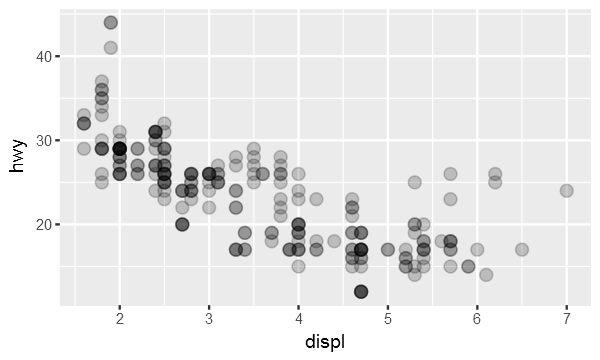

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy),alpha = .2,size=3) # 투명도(20%) -> 5개가 겹쳐야 100%가 된다.


 - 또 다른 겹칠때 사용하는 그래프 (jitter)
 - jitter : 떨림효과가 있는 그래프, 겹쳐 있는 점이 있다면 살짝씩 떨려서 보인다. 

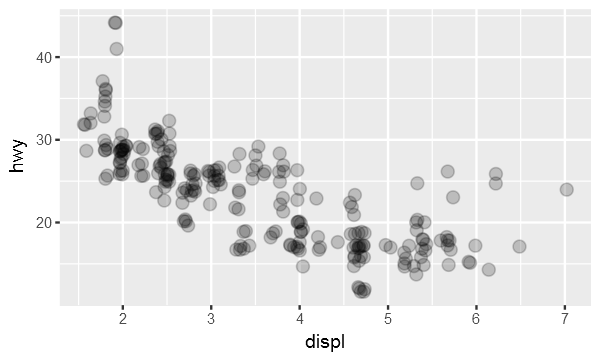

In [18]:
ggplot(data = mpg) + 
  geom_jitter(mapping = aes(x = displ, y = hwy),alpha = .2,size=3)

### 3.3.1  Exercise
 1. What’s gone wrong with this code? Why are the points not blue?

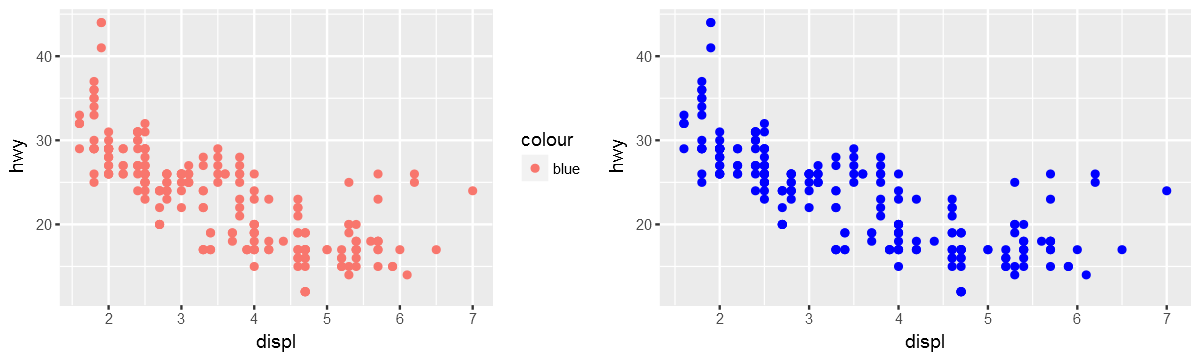

In [19]:
options(repr.plot.width = 10)
gg1 <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue")) # color 가 aes안에 있다면 데이터에 대해서 조건이 들어가야됨. 
## Answer
gg2 <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

grid.arrange(gg1,gg2,ncol=2)


#### ETC 

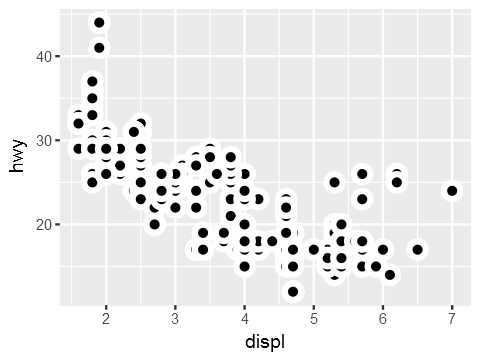

In [20]:
options(repr.plot.width = 4)
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), shape=21, 
             color = "white", 
             fill='black', size=3,
             stroke=2) # stroke 테두리 굵기

### Mapping 
 - 어떤 데이터의 모든 원소에 함수를 적용하고 싶다면 Mapping을 사용
 - Mapping의 결과는 list형태 
 - Vector형태로 출력을 얻고 싶다면 Mapping_chr와 같이 타입형을 가진 Mapping함수를 사용. (purrr에 있다.)

In [21]:
era <- function(year){
  if(year < 2001){
    return('pre')
  }else if(year < 2004){
    return('mid')
  }else{
    return('post')
  }
}

In [22]:
era(2001)

[1] "mid"

In [23]:
purrr::map(mpg$year,era)[1:3] # List로 나온다.

[[1]]
[1] "pre"

[[2]]
[1] "pre"

[[3]]
[1] "post"

In [24]:
purrr::map_chr(mpg$year,era)[1:4] # 어떤 데이터의 모든 원소에 함수를 적용. 문자 Vector로 변환하여 출력.

[1] "pre"  "pre"  "post" "post"

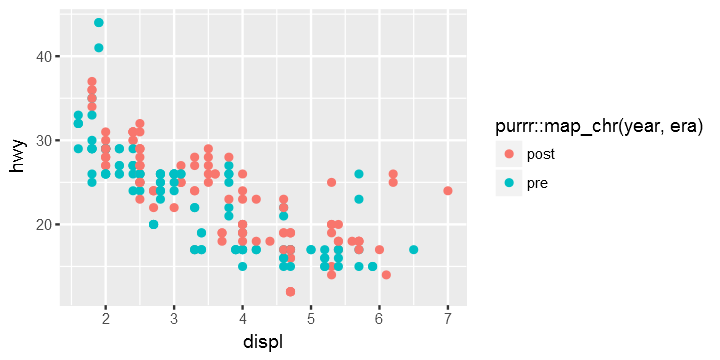

In [25]:
options(repr.plot.width = 6)
ggplot(data=mpg) + 
  geom_point(aes(displ,hwy,color=purrr::map_chr(year,era)))

In [26]:
map_dbl(c(1,2,3), function(x){x+1})

[1] 2 3 4

In [27]:
cut(mpg$year,c(1998,2001,2004,2009))

[1] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
  [7] (2004,2009] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001]
 [13] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (2004,2009] (2004,2009]
 [19] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (2004,2009] (1998,2001]
 [25] (1998,2001] (2004,2009] (2004,2009] (2004,2009] (2004,2009] (2004,2009]
 [31] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (1998,2001] (2004,2009]
 [37] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (1998,2001] (2004,2009]
 [43] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009] (2004,2009]
 [49] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009] (2004,2009]
 [55] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (2004,2009]
 [61] (2004,2009] (1998,2001] (2004,2009] (1998,2001] (2004,2009] (2004,2009]
 [67] (2004,2009] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
 [73] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (1998,2001]
 [79] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
 [85] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (1998,2001] (2004,2009]
 [91] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
 [97] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (1998,2001]
[103] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (2004,2009] (2004,2009]
[109] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
[115] (2004,2009] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (2004,2009]
[121] (2004,2009] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
[127] (2004,2009] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (2004,2009]
[133] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (1998,2001]
[139] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (2004,2009]
[145] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009]
[151] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
[157] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009]
[163] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (1998,2001]
[169] (1998,2001] (2004,2009] (2004,2009] (2004,2009] (2004,2009] (1998,2001]
[175] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001]
[181] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009]
[187] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001]
[193] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (2004,2009]
[199] (1998,2001] (2004,2009] (1998,2001] (1998,2001] (2004,2009] (1998,2001]
[205] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009]
[211] (2004,2009] (1998,2001] (1998,2001] (1998,2001] (1998,2001] (2004,2009]
[217] (2004,2009] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (1998,2001]
[223] (1998,2001] (1998,2001] (1998,2001] (2004,2009] (2004,2009] (1998,2001]
[229] (1998,2001] (2004,2009] (2004,2009] (1998,2001] (1998,2001] (2004,2009]
Levels: (1998,2001] (2001,2004] (2004,2009]

 - cut으로도 지정이 가능하다.

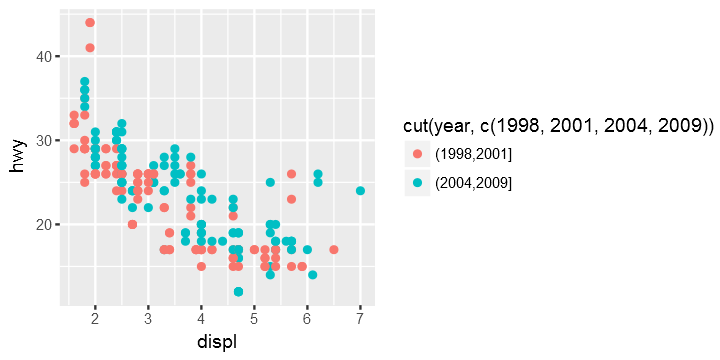

In [28]:
ggplot(data=mpg) + 
  geom_point(aes(displ,hwy,color=cut(year,c(1998,2001,2004,2009))))

### Tips 
 - Chapter 28. Theme 를 이용해서 그래프에 제목과 같은 할 수 있는 것을 알려준다.

## 3.5 Facets 
 - Using Categorical variables to split plot into facets
 - grid : 격자 
 - wrap : 그림이 길어지면 자동으로 다음줄로 넘기는 형식(하나씩 그려주다가)

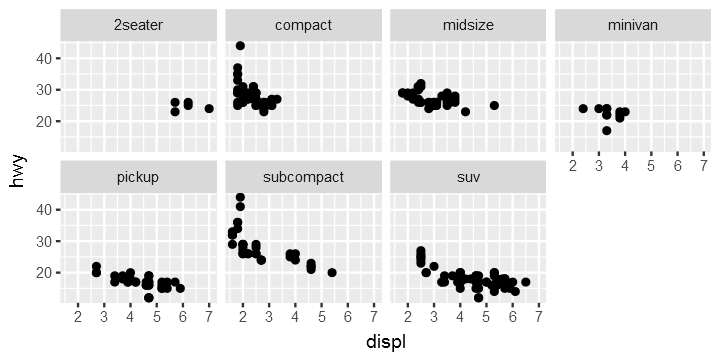

In [29]:
## 최대 row = 2 
ggplot(data=mpg) + 
  geom_point(aes(x=displ, y=hwy)) + facet_wrap(~class,nrow=2) # Class별로 따로그려라  

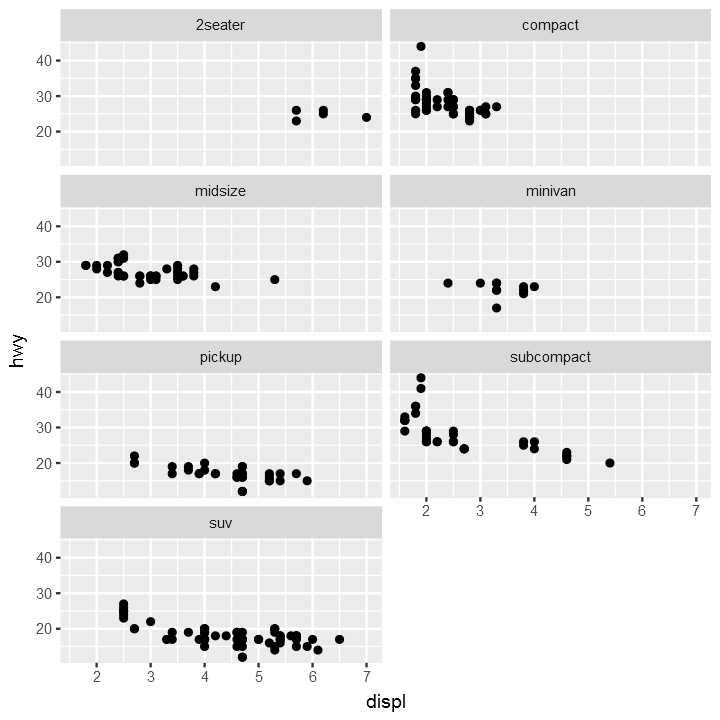

In [30]:
## 최대 Col = 2
options(repr.plot.height=6)
ggplot(data=mpg) + 
  geom_point(aes(x=displ, y=hwy)) + facet_wrap(~class,ncol=2) # Class별로 따로그려라 

 - facet_grid(~변수) : 가로를 쪼갠다 (명목변수에 한해서)

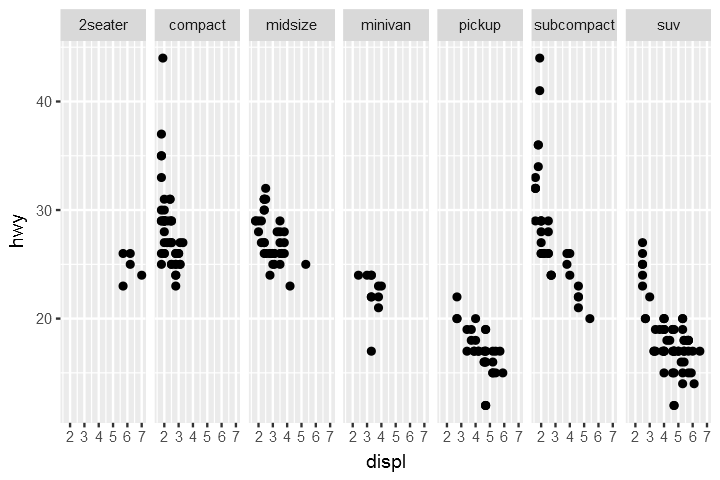

In [31]:
options(repr.plot.height=4)
ggplot(data=mpg) +
  geom_point(aes(x=displ, y=hwy)) + facet_grid(~class) # 격자처럼 쪼개서 그린다. 가로를 쪼갠다

 - facet_grid(변수~.) : 세로를 쪼갠다 (명목변수에 한해서)

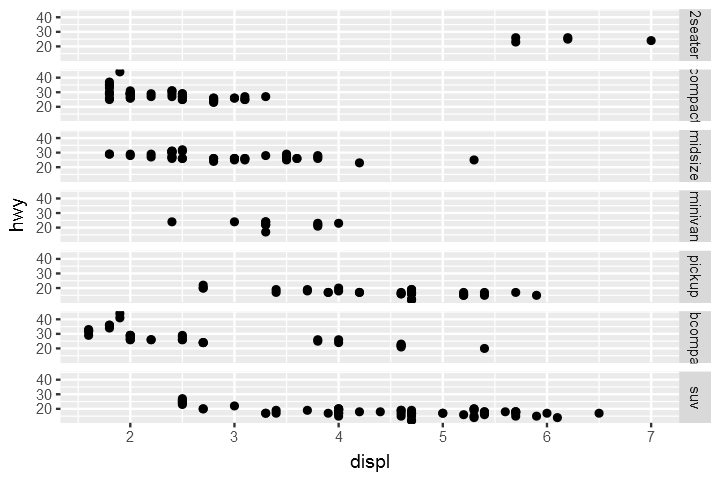

In [32]:
ggplot(data=mpg) +
  geom_point(aes(x=displ, y=hwy)) + facet_grid(class~.) # 격자처럼 쪼개서 그린다. 세로를 쪼갠다.

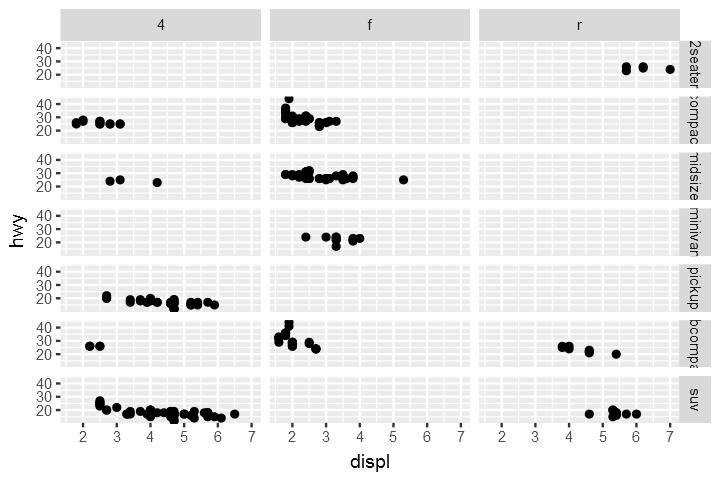

In [33]:
ggplot(data=mpg) +
  geom_point(aes(x=displ, y=hwy)) + facet_grid(class~drv) # 세로로는 Class, 가로로는 drv로 쪼갠다.

### 그래프를 하나로 그리게 되면 한눈에 알아보기 좋다. 하지만 색이 많다면은 알아보기 힘들다.

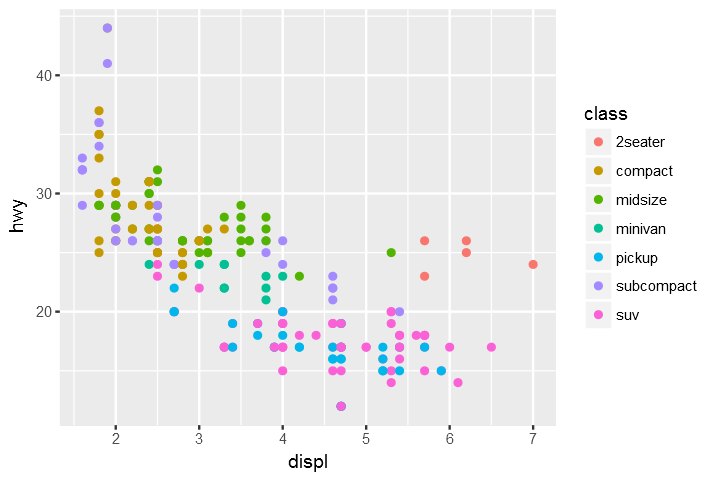

In [34]:
options(repr.plot.height=4)
ggplot(data=mpg) +
  geom_point(aes(x=displ, y=hwy, color = class))

### 가로로 짜르게 되면 아래와 같이 보기 쉬워진다.

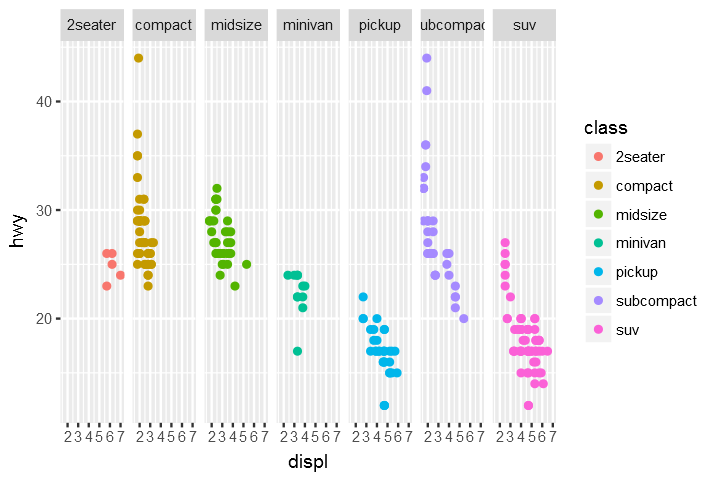

In [35]:
ggplot(data=mpg) +
  geom_point(aes(x=displ, y=hwy, color = class)) + facet_grid(~class)

### 3.6 Geometric objects
 - Geom_smoothed : 이평선이랑 비슷한 개념으로 생각하면 된다.
 - 부분 데이터들의 회기선을 이어서 붙이는 것을 로이스 라고 한다. 끝부분에서도 패턴을 찾아낸다. 
 - geom_smooth()` using method = 'loess'

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


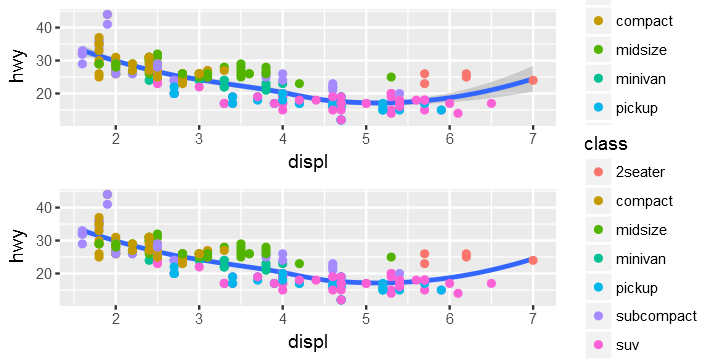

In [36]:
options(repr.plot.height=3)
gg1 <- ggplot(data=mpg) +
  geom_smooth(aes(displ,hwy)) +
  geom_point(aes(displ,hwy,color=class))
gg2 <- ggplot(data=mpg) +
  geom_smooth(aes(displ,hwy), se=F) +
  geom_point(aes(displ,hwy,color=class))

grid.arrange(gg1,gg2)

 - 전체 데이터의 회귀선, se(standard error)=F를 하게 되면 신뢰구간 =  F

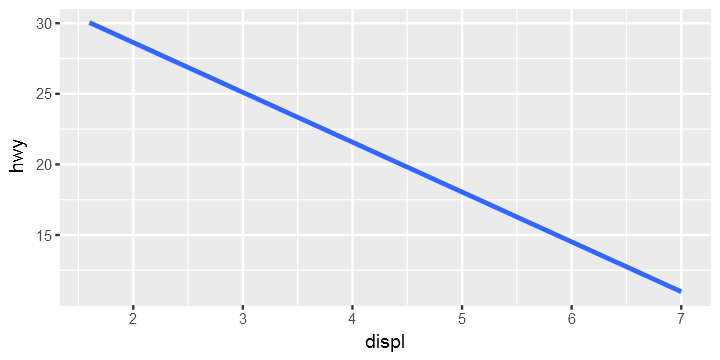

In [37]:
ggplot(data=mpg) +
  geom_smooth(aes(displ,hwy),method = 'lm',se=F)

 - 공통요소들은 ggplot 안으로 들어가면 된다. 

`geom_smooth()` using method = 'loess'


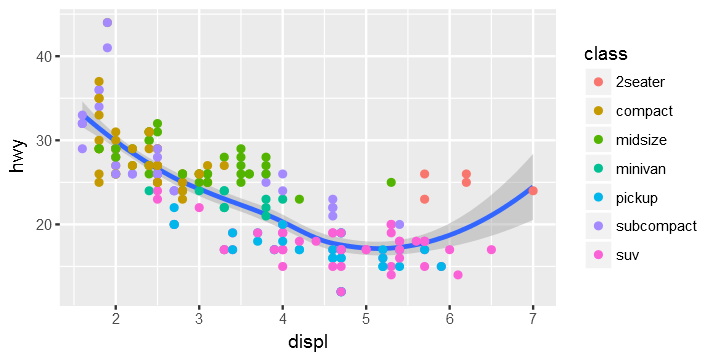

In [38]:
ggplot(data=mpg, aes(displ,hwy)) + geom_smooth() + geom_point(aes(color=class))

#### smooth 는 선인데 어떻게 다르게 할까

`geom_smooth()` using method = 'loess'


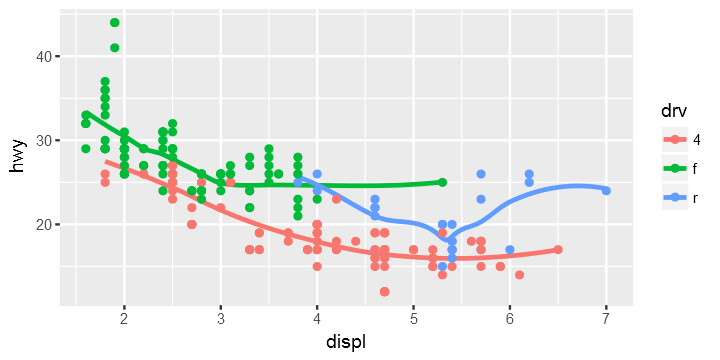

In [39]:
ggplot(data=mpg, aes(displ,hwy,color=drv)) + geom_smooth(se=F) + geom_point()

Warning message:
: Ignoring unknown aesthetics: .`geom_smooth()` using method = 'loess'


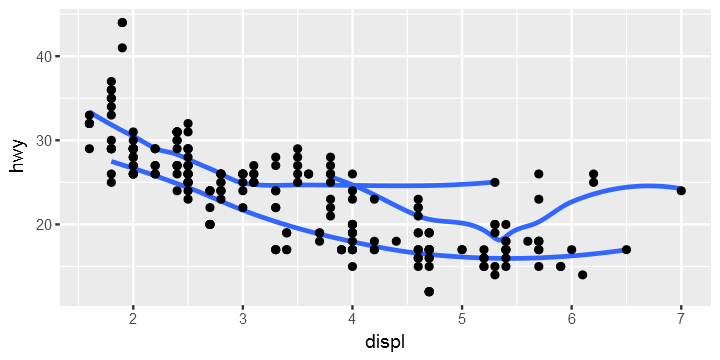

In [40]:
ggplot(data=mpg, aes(displ,hwy)) + 
  geom_smooth(aes(.=drv),se=F) + # . 대신에 group=drv
  geom_point() #선만 따로 그린다. 

 - linetype 또한 다르게 할 수 있다.

`geom_smooth()` using method = 'loess'


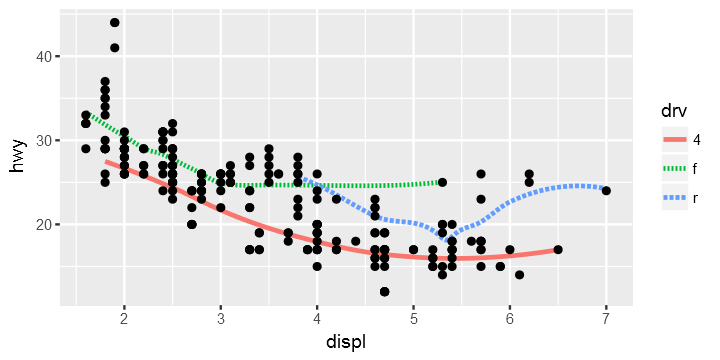

In [41]:
ggplot(data=mpg, aes(displ,hwy)) + 
  geom_smooth(aes(linetype=drv,color=drv), se=F) + 
  geom_point()

### dplyr Filter 사용 가능.

`geom_smooth()` using method = 'loess'


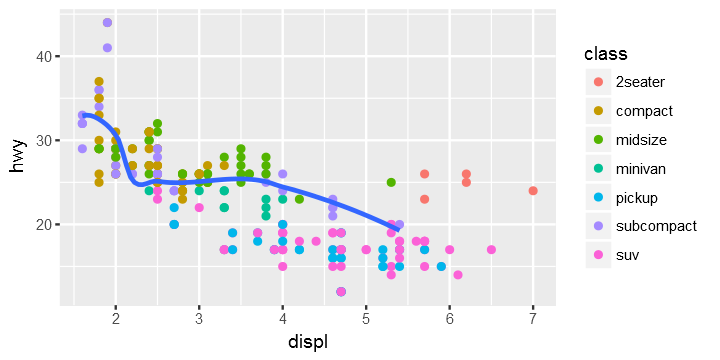

In [42]:
ggplot(data=mpg, aes(displ,hwy)) + 
  geom_point(aes(color=class)) +
  geom_smooth(data=filter(mpg,class=='subcompact'), se=F)

### 3.7 Exercise

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


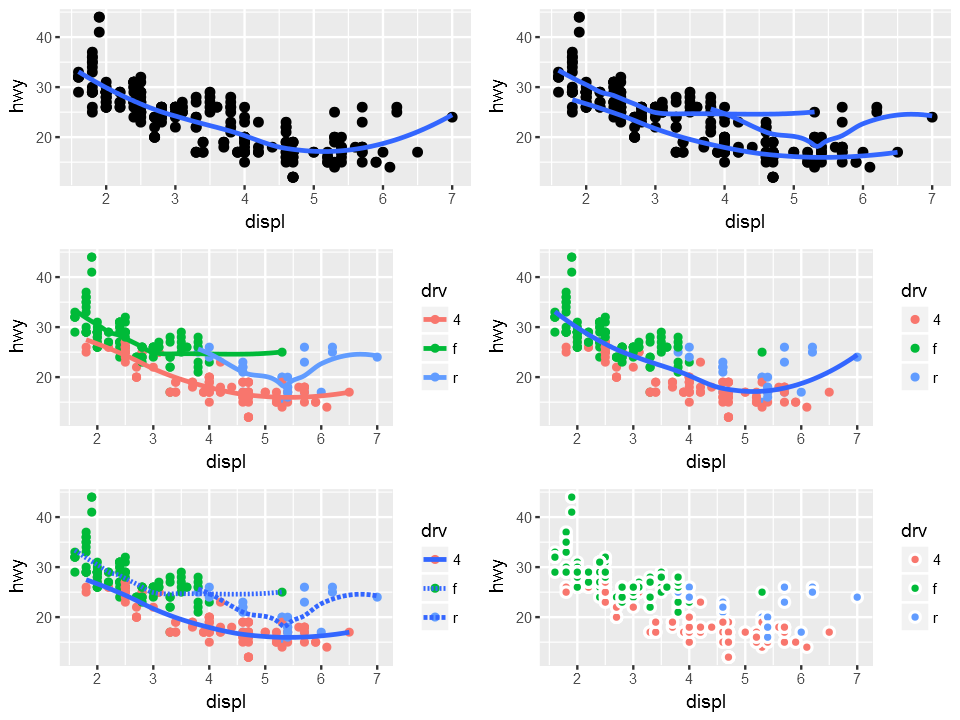

In [43]:
options(repr.plot.height=6,repr.plot.width=8)
gg <- ggplot(data=mpg, aes(displ,hwy))

gg1 <- gg + geom_point(size=2) + geom_smooth(se=F)
gg2 <- gg + geom_point(size=2) + geom_smooth(aes(group=drv), se=F)
gg3 <- gg + geom_point(aes(color=drv)) + geom_smooth(aes(color=drv),se=F)
gg4 <- gg + geom_point(aes(color=drv)) + geom_smooth(se=F)
gg5 <- gg + geom_point(aes(color=drv)) + geom_smooth(aes(linetype=drv),se=F)
gg6 <- gg +
  geom_point(aes(fill=drv),color="white",shape=21, size=2,
             stroke=1) 

grid.arrange(gg1,gg2,gg3,gg4,gg5,gg6)

In [44]:
options(repr.plot.height=3,repr.plot.width=5)

### 3.7 Statistical Transformations 

In [45]:
head(diamonds)

  carat       cut color clarity depth table price    x    y    z
1  0.23     Ideal     E     SI2  61.5    55   326 3.95 3.98 2.43
2  0.21   Premium     E     SI1  59.8    61   326 3.89 3.84 2.31
3  0.23      Good     E     VS1  56.9    65   327 4.05 4.07 2.31
4  0.29   Premium     I     VS2  62.4    58   334 4.20 4.23 2.63
5  0.31      Good     J     SI2  63.3    58   335 4.34 4.35 2.75
6  0.24 Very Good     J    VVS2  62.8    57   336 3.94 3.96 2.48

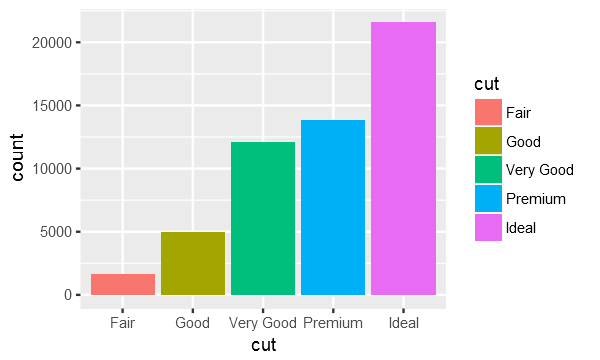

In [46]:
ggplot(diamonds) + geom_bar(aes(x=cut,fill=cut))

### dataframe vs tibble
 - DataFrame to tibble = as_data_frame() or as_tibble()

In [47]:
a <- data.frame(x=c(1,4,7), y=c(2,3,4)) #  열방식으로 들어간다.
tibble(x=c(1,2,3), y=c(2,3,4)) # 열형태로도 되고 행 형태로도 된다.

#tribble(
#  ~x, ~y,
#  1,5,
#  2,3,
#  4,7
#  ) # 왜 안되지? 낼 물어봐야지...

,x,y
1,1,2
2,2,3
3,3,4


In [48]:
str(as_data_frame(a)) # tibble

Classes 'tbl_df', 'tbl' and 'data.frame':	3 obs. of  2 variables:
 $ x: num  1 4 7
 $ y: num  2 3 4


In [49]:
str(as_tibble(a))

Classes 'tbl_df', 'tbl' and 'data.frame':	3 obs. of  2 variables:
 $ x: num  1 4 7
 $ y: num  2 3 4


###  read.csv (dataframe vs tibble)
  - read.csv() : data.frame으로 나옴
  - read_csv() : tibble로 나옴
  - data.table

 - Percent of Data 

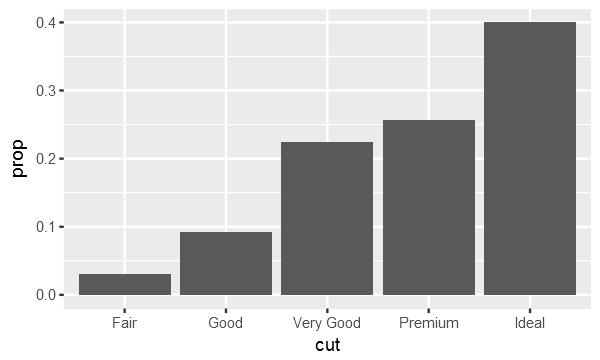

In [50]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

### 3.3.8 Position

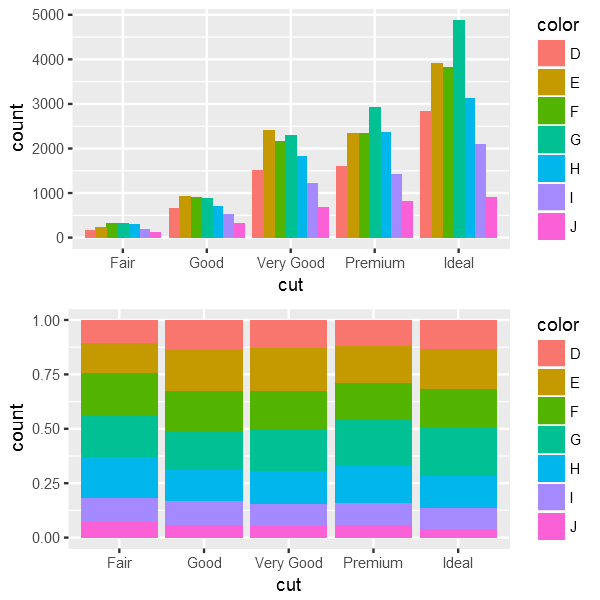

In [51]:
options(repr.plot.height=5)
gg1 <- ggplot(data=diamonds) + geom_bar(aes(cut,fill=color), position='dodge')
gg2 <- ggplot(data=diamonds) + geom_bar(aes(cut,fill=color), position='fill') # 100%로 꽉채운 후 비율을 나타낸다.

grid.arrange(gg1,gg2)

In [52]:
options(repr.plot.height=3,repr.plot.width=9)

### 3.3.9 Coordinate systems

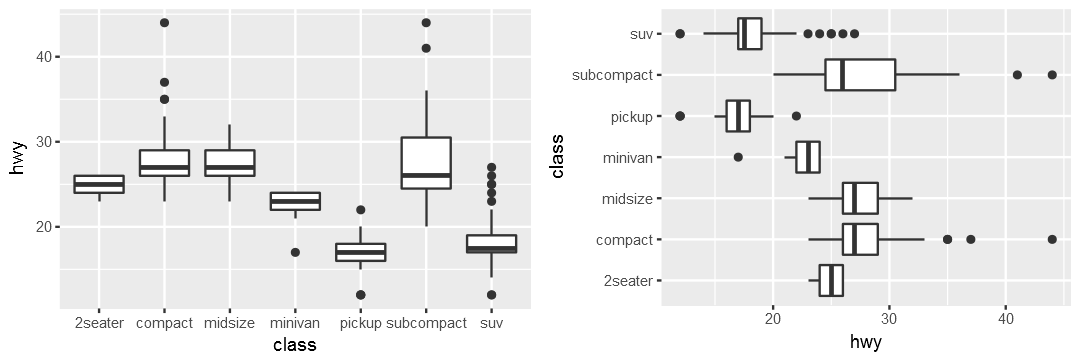

In [53]:
gg1 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
gg2 <- ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()

grid.arrange(gg1,gg2,ncol=2)

### coord_polar()

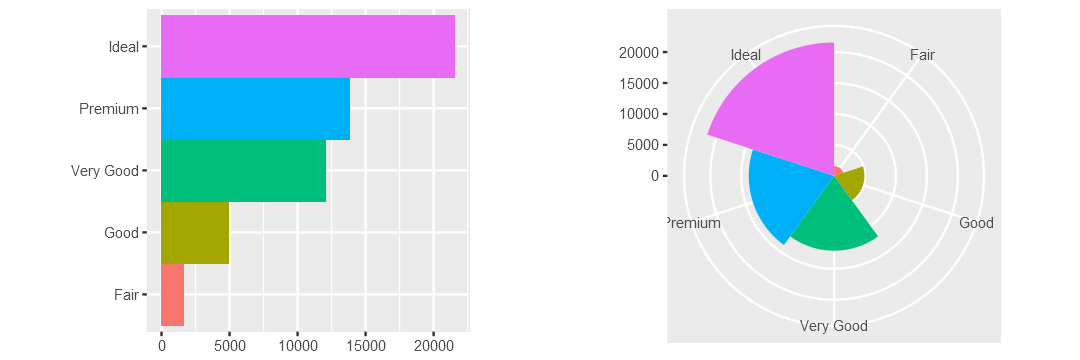

In [54]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

gg1 <- bar + coord_flip()
gg2 <- bar + coord_polar()

grid.arrange(gg1,gg2,ncol=2)

### Line Graph

In [55]:
options(repr.plot.height=3)

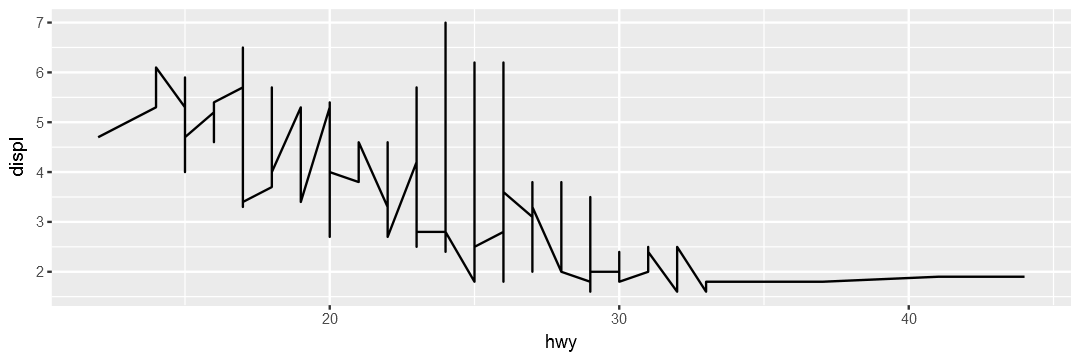

In [56]:
ggplot(mpg) + geom_line(aes(hwy,displ))

In [57]:
jan = flights %>% filter(month == 1) %>% 
  group_by(day) %>% mutate(count = n())

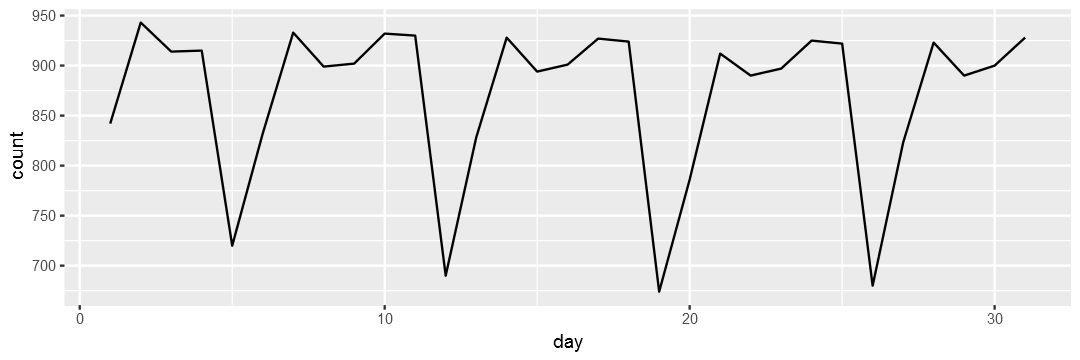

In [58]:
ggplot(jan,aes(day,count)) + geom_line()

In [59]:
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [60]:
daily <- flights %>% group_by(month, day) %>% mutate(date=make_date(year,month,day), count=n())

`geom_smooth()` using method = 'gam'


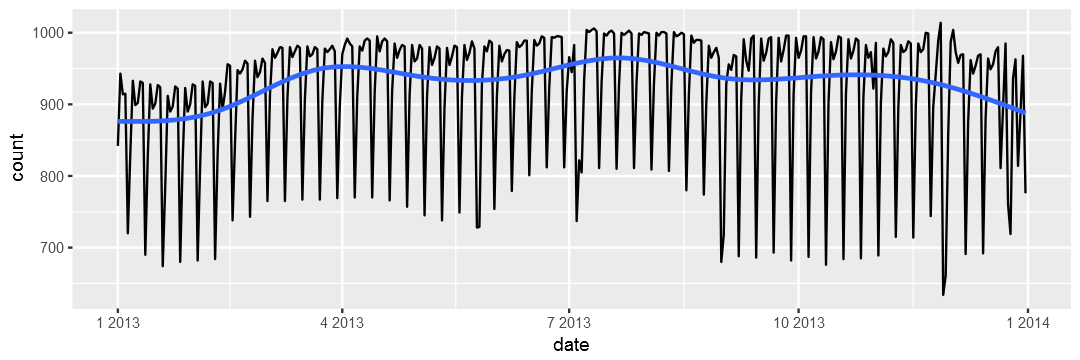

In [61]:
ggplot(daily,aes(date,count)) + geom_line() + geom_smooth() # smooth를 사용하면 추세를 볼 수 있다. 

## 시계열 
 - Trend : 추세 
 - Seasonality : 시즌이 아니더라도 일정 주기적으로 반복되는 패턴.
 - Auto Colrealation : 자기상관 , 
  - 예) 주가, 어제가 오르면 오늘도 오른다, 어제 내리면 오늘도 내린다와 같이 하루 전 또는 이틀 전의 패턴이 오늘에영향을 준다.
